## Import Statement

In [1]:
# Import statements
import pandas as pd
import textblob
from textblob import Word, TextBlob
import nltk
from nltk.corpus import stopwords
import re # regular expression
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
os.getcwd() #getcurrent working directory

'C:\\Users\\HIMANSHU MISHRA\\Desktop\\DVS-DS-OCT-2019\\end to end project sentimental analysis'

In [3]:
# Set the path
path = "C:\\Users\\Himanshu Mishra\\Desktop"
os.chdir(path)
os.getcwd()

'C:\\Users\\Himanshu Mishra\\Desktop'

In [4]:
os.getcwd()

'C:\\Users\\Himanshu Mishra\\Desktop'

In [5]:
# Import Excel data
OriginalData = pd.read_excel("Glassdoor reviews.xlsx", header = 0,
                            index = False, na_values = ['NaN'])

In [6]:
OriginalData.shape

(1365, 2)

In [7]:
OriginalData.head()

,Pros,Cons
0,"A very good company, working environment is ve...",Paywise iit is very less
1,Good working environment in Bangalore,compensation is not that great
2,it has good work environment,they do not have good opportunities any more i...
3,Company is good to work .\r\r\nWork life bala...,Very less hike now a days .\r\r\nAnnual variab...
4,"Equality among the colleagues ,Stress free env...",I would say I don't find any cons in accent


In [8]:
OriginalData.tail()

,Pros,Cons
1360,Learn sql and some business tactic . But bette...,Only above thing. Nothing else you can have he...
1361,Great pace to work. Should invest more on hr p...,None that I can think of
1362,Good working environment\r\r\nGood Opportuniti...,1. Salary hikes are not good\r\r\n2. No Work l...
1363,More freedom on your work. Individual efforts ...,Too individualistic. Individual efforts are co...
1364,No Peer Pressure\r\r\nHighly Professional Envi...,Less Pay Hikes\r\r\nLess learning and growth


In [9]:
# Check if data null values in all the columns
OriginalData.loc[OriginalData.Cons.isnull() & OriginalData.Pros.isnull()]

,Pros,Cons
731,NaN,NaN


In [10]:
OriginalData1=OriginalData.drop([731],axis=0)

In [11]:
OriginalData1.shape

(1364, 2)

In [13]:
OriginalData1.loc[OriginalData1.Cons.isnull() & OriginalData1.Pros.isnull()]

,Pros,Cons


In [14]:
# Drop the rows with all nulls

OriginalData = OriginalData.drop(OriginalData[(OriginalData.Cons.isnull() & OriginalData.Pros.isnull())].index)

In [15]:
OriginalData1.shape

(1364, 2)

In [17]:
# Check if data has null in cons
OriginalData1.loc[(OriginalData1.Cons.isnull())]

,Pros,Cons
169,- Good work life balance\r\r\n- Open door pol...,NaN
408,-Onsite opportunities are good if you are in E...,NaN
552,-Highly caring about peoples and cultures\r\r\...,NaN
653,- Good Work Environment\r\r\n- Work Life Balan...,NaN
671,- Good work environment\r\r\n- Good policies\r...,NaN
787,"- If you are in right team, you get to work on...",NaN
807,- Flexible work culture\r\r\n- Plenty of oppor...,NaN
1187,-- You will get a lot of exposure to work on t...,NaN


In [16]:
# Check if data has null in pros
OriginalData1.loc[(OriginalData1.Pros.isnull())]

,Pros,Cons


In [17]:
# Replace null columns in cons column to "No Cons"
OriginalData1.loc[(OriginalData1.Cons.isnull())] = "No Cons"

In [19]:
OriginalData1.head()

,Pros,Cons
0,"A very good company, working environment is ve...",Paywise iit is very less
1,Good working environment in Bangalore,compensation is not that great
2,it has good work environment,they do not have good opportunities any more i...
3,Company is good to work .\r\r\nWork life bala...,Very less hike now a days .\r\r\nAnnual variab...
4,"Equality among the colleagues ,Stress free env...",I would say I don't find any cons in accent


In [20]:
OriginalData1.shape

(1364, 2)

In [21]:
OriginalData1.loc[OriginalData1["Cons"].isnull() | OriginalData1["Pros"].isnull()]

,Pros,Cons


In [22]:
# Divide the data into pros and cons
prosdf = pd.DataFrame(OriginalData1["Pros"])

In [23]:
prosdf.shape

(1364, 1)

In [24]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\r\r\nWork life bala...
4,"Equality among the colleagues ,Stress free env..."


In [25]:
# Divide the data into pros and cons
consdf = pd.DataFrame(OriginalData1["Cons"])
print(consdf.shape)
print(consdf.head())

(1364, 1)
                                                Cons
0                           Paywise iit is very less
1                     compensation is not that great
2  they do not have good opportunities any more i...
3  Very less hike now a days .\r\r\nAnnual variab...
4        I would say I don't find any cons in accent


In [30]:
# Write some functions

# Function to clean data
def clean_review(text):
    '''
    This fucntion is to clean the data
    '''
    letters_only = re.sub("[^a-zA-Z]"," ", text) # Remove all digits and punctuation
    words = letters_only.lower().split() # Convert it into lower case and then stroing in word format
    clean_words = [w for w in words if len(w) > 2] # Remove 1/2 letter words
    return(" ".join(clean_words))

# Function to identify stop words
def stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to plot word cloud
def plot_word_cloud(text):
    wordcloud = WordCloud().generate(text) # Plot wordcloud using WordCloud function
    
    %matplotlib inline # plot the graph in the same window
    
    fig = plt.figure(figsize = (8,6)) # set the figure margins
    plot = plt.imshow(wordcloud) # show the plot
    return plot

# Function to return stopwords
def stopwordcount(plist):
    return sum(plist, [])


In [31]:
clean_review("Compensation123,. is 999 ???$not that great!!!\r\r")

'compensation not that great'

In [32]:
stop_words("Compensation is not or  or that great")

['that', 'is', 'or', 'not']

In [33]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\r\r\nWork life bala...
4,"Equality among the colleagues ,Stress free env..."


In [34]:
# Identify stop words in the prosdf data
prosdf['PreCleanStopWords'] = prosdf['Pros'].apply(lambda x: stop_words(x))

In [35]:
prosdf.head()

,Pros,PreCleanStopWords
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]"
1,Good working environment in Bangalore,[in]
2,it has good work environment,"[it, has]"
3,Company is good to work .\r\r\nWork life bala...,"[to, is]"
4,"Equality among the colleagues ,Stress free env...",[the]


In [36]:
# Clean the prosdf data
prosdf['CleanedReview'] = prosdf['Pros'].apply(lambda x: clean_review(x))

In [37]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]",very good company working environment very goo...
1,Good working environment in Bangalore,[in],good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...


In [38]:
# Identify stop words in cleaned data
prosdf['PostCleanStopWords'] = prosdf['CleanedReview'].apply(lambda x: stop_words(x))

In [39]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]",very good company working environment very goo...,"[very, and, other]"
1,Good working environment in Bangalore,[in],good working environment bangalore,[]
2,it has good work environment,"[it, has]",has good work environment,[has]
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company good work work life balance,[]
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the]


In [40]:
# Clean the data, identify stop words in original data and clean data in consdf
consdf['PreCleanStopWords'] = consdf['Cons'].apply(lambda x: stop_words(x))
consdf['CleanedReview'] = consdf['Cons'].apply(lambda x: clean_review(x))
consdf['PostCleanStopWords'] = consdf['CleanedReview'].apply(lambda x: stop_words(x))

In [41]:
consdf.head()

,Cons,PreCleanStopWords,CleanedReview,PostCleanStopWords
0,Paywise iit is very less,"[very, is]",paywise iit very less,[very]
1,compensation is not that great,"[that, is, not]",compensation not that great,"[that, not]"
2,they do not have good opportunities any more i...,"[they, not, do, have, more, any, in]",they not have good opportunities any more rpa,"[they, not, have, more, any]"
3,Very less hike now a days .\r\r\nAnnual variab...,"[very, now, between, will, a, are, if, in, you]",very less hike now days annual variable pay yo...,"[very, now, between, will, are, you]"
4,I would say I don't find any cons in accent,"[i, any, in, don't]",would say don find any cons accent,"[don, any]"


In [43]:
# Extract stop words from prosdf data
stopWords = stopwordcount(prosdf['PostCleanStopWords'])
stopWords[0:10]

['very', 'and', 'other', 'has', 'the', 'this', 'will', 'you', 'and', 'are']

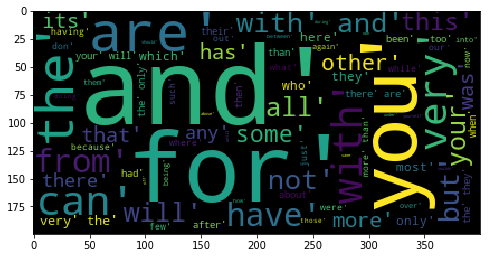

In [44]:
wordcloud = WordCloud().generate(str(stopWords)) # Plot wordcloud using WordCloud function
    
%matplotlib inline # plot the graph in the same window
    
fig = plt.figure(figsize = (8,6)) # set the figure margins
plot = plt.imshow(wordcloud) # show the plot

In [46]:
print(Counter(stopWords))

Counter({'and': 399, 'for': 261, 'the': 193, 'you': 177, 'are': 175, 'with': 139, 'very': 106, 'can': 85, 'from': 73, 'have': 73, 'will': 64, 'your': 62, 'not': 51, 'but': 49, 'all': 46, 'this': 42, 'there': 42, 'more': 39, 'some': 38, 'other': 37, 'they': 37, 'only': 34, 'has': 31, 'its': 31, 'that': 31, 'was': 30, 'any': 27, 'here': 24, 'which': 23, 'who': 21, 'than': 21, 'most': 19, 'about': 17, 'their': 16, 'had': 16, 'when': 15, 'too': 14, 'been': 13, 'then': 12, 'after': 12, 'don': 10, 'out': 10, 'just': 10, 'while': 9, 'few': 9, 'were': 9, 'where': 9, 'because': 8, 'such': 8, 'having': 7, 'what': 7, 'our': 7, 'now': 7, 'over': 6, 'being': 6, 'again': 6, 'them': 6, 'into': 6, 'doing': 5, 'those': 5, 'how': 4, 'between': 4, 'yourself': 3, 'above': 3, 'during': 3, 'same': 3, 'own': 3, 'until': 3, 'couldn': 3, 'off': 3, 'under': 3, 'should': 3, 'did': 2, 'both': 2, 'each': 2, 'through': 2, 'won': 2, 'why': 2, 'before': 2, 'below': 2, 'once': 1, 'themselves': 1, 'these': 1, 'doesn': 

In [47]:
# Function to identify  no stop words
def no_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to identify  no stop words
def clean_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(" ".join(stop_words))



In [48]:
consdf.columns

Index(['Cons', 'PreCleanStopWords', 'CleanedReview', 'PostCleanStopWords'], dtype='object')

In [49]:
# Remove stop words
prosdf['stop_removed'] = prosdf['CleanedReview'].apply(lambda x: no_stop_words(x))
consdf['stop_removed'] = consdf['CleanedReview'].apply(lambda x: no_stop_words(x))

In [50]:
# Remove stop words and clean text
prosdf['clean_text'] = prosdf['CleanedReview'].apply(lambda x: clean_stop_words(x))
consdf['clean_text'] = consdf['CleanedReview'].apply(lambda x: clean_stop_words(x))

In [51]:
prosdf.tail()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text
1360,Learn sql and some business tactic . But bette...,"[some, to, and, but]",learn sql and some business tactic but better ...,"[some, and, but]","[internal, issue, business, tactic, better, av...",learn sql business tactic better avoid interna...
1361,Great pace to work. Should invest more on hr p...,"[on, to, more, should]",great pace work should invest more policies wo...,"[more, should]","[invest, pace, work, policies, great, life, ba...",great pace work invest policies work life balance
1362,Good working environment\r\r\nGood Opportuniti...,[for],good working environment good opportunities fo...,[for],"[growth, environment, working, good, opportuni...",good working environment good opportunities gr...
1363,More freedom on your work. Individual efforts ...,"[are, your, on, more]",more freedom your work individual efforts are ...,"[are, your, more]","[individual, counted, work, efforts, freedom]",freedom work individual efforts counted
1364,No Peer Pressure\r\r\nHighly Professional Envi...,"[no, for]",peer pressure highly professional environment ...,[for],"[environment, extra, activities, curricular, p...",peer pressure highly professional environment ...


In [52]:
# Word Cloud
non_stopWords = stopwordcount(consdf['stop_removed'])
print(str(non_stopWords))
plot_word_cloud(str(non_stopWords))

['paywise', 'less', 'iit', 'great', 'compensation', 'rpa', 'good', 'opportunities', 'hike', 'days', 'leaving', 'annual', 'less', 'variable', 'pay', 'miss', 'year', 'say', 'would', 'cons', 'accent', 'find', 'growth', 'salary', 'less', 'hikes', 'employer', 'employee', 'company', 'centric', 'limited', 'location', 'chennai', 'projects', 'environment', 'maintain', 'send', 'full', 'working', 'two', 'depend', 'proper', 'tasks', 'managers', 'consider', 'bandwidth', 'enough', 'account', 'raise', 'behave', 'answered', 'back', 'selected', 'select', 'time', 'internal', 'scope', 'center', 'call', 'weekends', 'sychrony', 'module', 'answer', 'like', 'burdened', 'attitude', 'partiality', 'employees', 'queries', 'accent', 'problem', 'manager', 'much', 'hike', 'assign', 'speak', 'available', 'pick', 'illiterate', 'remove', 'know', 'particularly', 'voice', 'resource', 'one', 'want', 'interview', 'worked', 'facing', 'details', 'people', 'politics', 'emergency', 'management', 'aged', 'come', 'though', 'thi

UsageError: unrecognized arguments: # plot the graph in the same window


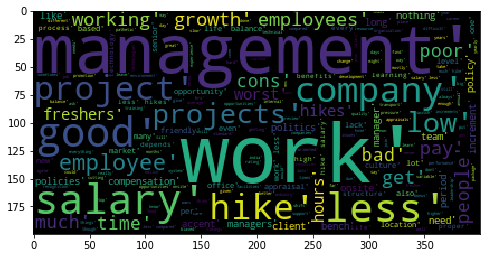

In [53]:
# Word cloud for consdf
wordcloud = WordCloud().generate(str(non_stopWords)) # Plot wordcloud using WordCloud function
    
#%matplotlib inline # plot the graph in the same window
    
fig = plt.figure(figsize = (8,6)) # set the figure margins
plot = plt.imshow(wordcloud)

In [54]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]",very good company working environment very goo...,"[very, and, other]","[culture, environment, new, working, compare, ...",good company working environment good friendly...
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[environment, good, bangalore, working]",good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment,[has],"[environment, work, good]",good work environment
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company good work work life balance,[],"[company, good, work, life, balance]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[environment, colleagues, stress, free, equali...",equality among colleagues stress free environment


In [55]:
prosdf.iloc[0,5]

'good company working environment good friendly work pressure less compare companies work culture good great opportunity learn new technology'

In [56]:
analysis = TextBlob(clean_review("good company working environment good friendly work pressure less compare companies work culture good great opportunity learn new technology"))

In [58]:
analysis.sentiment

Sentiment(polarity=0.4635281385281385, subjectivity=0.5101731601731603)

In [59]:
analysis.sentiment.subjectivity

0.5101731601731603

In [67]:
abc=TextBlob("india is a country")

In [68]:
abc.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [69]:
abc.sentiment.polarity

0.0

In [70]:
def analize_sentiment(review):
    analysis = TextBlob(clean_review(review))
    
    if analysis.sentiment.polarity > 0:
        return 1
    
    elif analysis.sentiment.polarity < 0:
        return -1
    
    else:
        return 0
    
def analize_sentiment1(review):
    analysis = TextBlob(clean_review(review))
    return analysis.sentiment.subjectivity

def getlabel(text):
    
    score = abs(text['ProsPolarity']) - abs(text['ConsPolarity'])
    
    if score > 0:
        label = 1
        
    elif score <0 :
        label = -1
        
    else:
        label =0
    
    return label

In [71]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]",very good company working environment very goo...,"[very, and, other]","[culture, environment, new, working, compare, ...",good company working environment good friendly...
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[environment, good, bangalore, working]",good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment,[has],"[environment, work, good]",good work environment
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company good work work life balance,[],"[company, good, work, life, balance]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[environment, colleagues, stress, free, equali...",equality among colleagues stress free environment


In [72]:
prosdf['Polarity'] = prosdf['CleanedReview'].apply(lambda x: analize_sentiment(x))
consdf['Polarity'] = consdf['CleanedReview'].apply(lambda x: analize_sentiment(x))

In [73]:
prosdf['Subjectivity'] = prosdf['CleanedReview'].apply(lambda x: analize_sentiment1(x))
consdf['Subjectivity'] = consdf['CleanedReview'].apply(lambda x: analize_sentiment1(x))

In [74]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text,Polarity,Subjectivity
0,"A very good company, working environment is ve...","[very, other, as, to, a, and, is]",very good company working environment very goo...,"[very, and, other]","[culture, environment, new, working, compare, ...",good company working environment good friendly...,1,0.557027
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[environment, good, bangalore, working]",good working environment bangalore,1,0.600000
2,it has good work environment,"[it, has]",has good work environment,[has],"[environment, work, good]",good work environment,1,0.600000
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company good work work life balance,[],"[company, good, work, life, balance]",company good work work life balance,1,0.600000
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[environment, colleagues, stress, free, equali...",equality among colleagues stress free environment,1,0.800000


In [75]:
prosdf["Polarity"].value_counts()

 1    1138
 0     173
-1      53
Name: Polarity, dtype: int64

Text(0.5,0,'prosploarity')

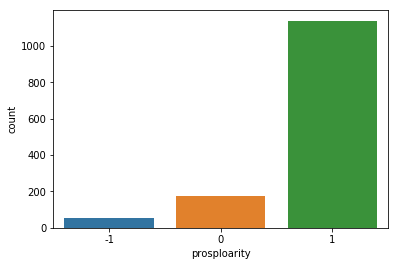

In [76]:
import seaborn as sns
sns.countplot(prosdf["Polarity"])
plt.xlabel("prosploarity")

In [77]:
prosconsdf = pd.DataFrame(prosdf['CleanedReview'] + ' ' + consdf['CleanedReview'])

In [78]:
prosconsdf.head()

,CleanedReview
0,very good company working environment very goo...
1,good working environment bangalore compensatio...
2,has good work environment they not have good o...
3,company good work work life balance very less ...
4,equality among the colleagues stress free envi...


In [79]:
prosconsdf['words'] = prosconsdf['CleanedReview'].apply(lambda x : len([x for x in x.split()]))

In [80]:
prosconsdf.shape

(1364, 2)

In [81]:
prosconsdf.head()

,CleanedReview,words
0,very good company working environment very goo...,28
1,good working environment bangalore compensatio...,8
2,has good work environment they not have good o...,12
3,company good work work life balance very less ...,24
4,equality among the colleagues stress free envi...,14


In [81]:
prosconsdf['ProsPolarity'] = prosdf.Polarity
prosconsdf['ConsPolarity'] = consdf.Polarity
prosconsdf['ProsSubjectivity'] = prosdf.Subjectivity
prosconsdf['ConsSubjectivity'] = consdf.Subjectivity

In [82]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000


In [83]:
prosconsdf['label'] = prosconsdf.apply(lambda x: getlabel(x), axis = 1)

In [84]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1


In [86]:
prosconsdf["label"].value_counts()

 0    919
 1    322
-1    123
Name: label, dtype: int64

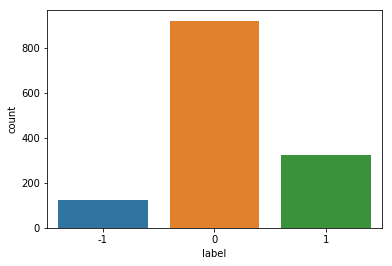

In [87]:
import seaborn as sns
sns.countplot(prosconsdf["label"])

In [88]:
prosconsdf['label1'] = prosconsdf['CleanedReview'].apply(lambda x: analize_sentiment(x))
    

In [90]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label,label1
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0,1
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0,1
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0,1
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0,1
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1,1


In [91]:
 prosconsdf['label1'].value_counts()

 1    1117
-1     196
 0      51
Name: label1, dtype: int64

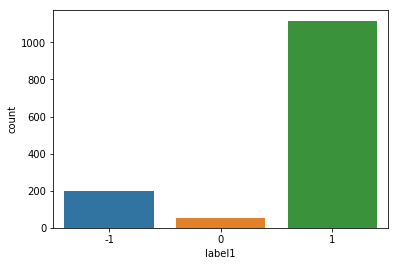

In [92]:
import seaborn as sns
sns.countplot(prosconsdf['label1'])

In [93]:
prosconsdf.shape

(1364, 8)

In [90]:
prosconsdf.tail()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label,label1
1359,learn sql and some business tactic but better ...,26,1,1,0.250000,0.433333,0,1
1360,great pace work should invest more policies wo...,14,1,0,0.625000,0.000000,1,1
1361,good working environment good opportunities fo...,18,1,-1,0.600000,0.600000,0,1
1362,more freedom your work individual efforts are ...,16,1,1,0.466667,0.450000,0,1
1363,peer pressure highly professional environment ...,20,1,-1,0.316667,0.066667,0,1


In [94]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label,label1
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0,1
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0,1
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0,1
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0,1
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1,1


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(prosconsdf.CleanedReview)
print(sklearn_representation)

  (0, 3468)	0.4804303237685064
  (0, 1398)	0.198510015913219
  (0, 617)	0.11426925458089433
  (0, 3567)	0.1402491059947476
  (0, 1082)	0.12564178090870046
  (0, 139)	0.08602194959247891
  (0, 1328)	0.15854912821066897
  (0, 3560)	0.1396144427986961
  (0, 2471)	0.1908871427062222
  (0, 1836)	0.23854811004091406
  (0, 619)	0.24824143420567502
  (0, 2269)	0.164759320932948
  (0, 615)	0.19851615459545519
  (0, 770)	0.13064590148945754
  (0, 1416)	0.15854912821066897
  (0, 2239)	0.18044586552440076
  (0, 1818)	0.15854912821066897
  (0, 2139)	0.17351894891006037
  (0, 3211)	0.1924767046180477
  (0, 2344)	0.3468829204423604
  (0, 1574)	0.3468829204423604
  (1, 1398)	0.13696304557129202
  (1, 3567)	0.2902968589366643
  (1, 1082)	0.2600616530872592
  (1, 1416)	0.3281754531000532
  :	:
  (1362, 3287)	0.13664365591385366
  (1362, 1628)	0.4132550072871411
  (1362, 1315)	0.18722693988557712
  (1362, 1004)	0.4850722389412396
  (1362, 733)	0.5342812808291739
  (1362, 1629)	0.26714064041458696
  (1363

In [122]:
prosconsdf.head()


,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label,label1
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0,1
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0,1
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0,1
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0,1
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1,1


In [123]:
data_features = sklearn_representation.toarray()

In [124]:
type(data_features)

numpy.ndarray

In [125]:
data_features = pd.DataFrame(data_features)
data_features.shape

(1364, 3604)

In [126]:
data_features

,0,1,2,3,4,5,6,7,8,9,...,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.234106,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.130542,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.363380,0.0,0.135938,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.085686,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [127]:
Counter(prosconsdf.label1)

Counter({1: 1117, -1: 196, 0: 51})

In [128]:
data_features['Sentiment'] = prosconsdf.label1

In [129]:
Counter(data_features['Sentiment'])

Counter({1.0: 1116, -1.0: 196, 0.0: 51, nan: 1})

In [131]:
data_features=data_features.dropna()

In [132]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_features, test_size = 0.2,random_state=0)


In [133]:
data_features=data_features.dropna()

In [134]:
train.x = train.drop(["Sentiment"],axis=1)
train.y = train['Sentiment']

test.x = test.drop(["Sentiment"],axis=1)
test.y = test['Sentiment']

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attr

In [135]:
Counter(test.y)

Counter({1.0: 219, -1.0: 41, 0.0: 13})

In [136]:
Counter(train.y)

Counter({1.0: 897, -1.0: 155, 0.0: 38})

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [138]:
gnb = GaussianNB()
y_pred = gnb.fit(train.x, train.y).predict(test.x)
confusion_matrix(test.y, y_pred)


array([[ 14,   1,  26],
       [  4,   2,   7],
       [ 59,   7, 153]], dtype=int64)

In [139]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)

In [140]:
accuracy_nb

0.6190476190476191

In [141]:
model_linear = svm.SVC(kernel="linear")#, decision_function_shape="ovr")
preds = model_linear.fit(train.x,train.y.astype(int)).predict(test.x)

In [142]:
model_linear = svm.SVC(kernel="linear")#, decision_function_shape="ovr")
model_linear.fit(train.x,train.y.astype(int))

preds = model_linear.predict(test.x)

In [143]:
confusion_matrix(test.y.astype(int),preds)

array([[  0,   0,  41],
       [  0,   1,  12],
       [  0,   1, 218]], dtype=int64)

In [133]:
model_linear

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [144]:
accuracy_svm = metrics.accuracy_score(test.y.astype(int), preds)

In [145]:
accuracy_svm

0.8021978021978022

In [109]:
preds

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1